<a href="https://colab.research.google.com/github/Marqosneo/Stock-Analytics-ZoomCamp/blob/main/Module01_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# install main library YFinance
!pip install yfinance

In [2]:
# IMPORTS
import numpy as np
import pandas as pd

#Fin Data Sources
import yfinance as yf
import pandas_datareader as pdr

#Data viz
import plotly.graph_objs as go
import plotly.express as px

import time
from datetime import date, timedelta


In [3]:

end = date.today()
print(f'Year = {end.year}; month= {end.month}; day={end.day}')

start = date(year=end.year-70, month=end.month, day=end.day)
print(f'Period for indexes: {start} to {end} ')

Year = 2024; month= 4; day=21
Period for indexes: 1954-04-21 to 2024-04-21 


## Question 1: [Macro] Average growth of GDP in 2023
What is the average growth (in %) of GDP in 2023?

Download the timeseries Real Gross Domestic Product (GDPC1) from FRED (https://fred.stlouisfed.org/series/GDPC1). Calculate year-over-year (YoY) growth rate (that is, divide current value to one 4 quarters ago). Find the average YoY growth in 2023 (average from 4 YoY numbers). Round to 1 digit after the decimal point: e.g. if you get 5.66% growth => you should answer 5.7

In [4]:
# Real Gross Domestic Product (GDPC1).
# https://fred.stlouisfed.org/series/GDPC1
gdpc1 = pdr.DataReader("GDPC1", "fred", start=start)
gdpc1

,GDPC1
DATE,
1954-07-01,2880.482
1954-10-01,2936.852
1955-01-01,3020.746
1955-04-01,3069.910
1955-07-01,3111.379
...,...
2022-10-01,21989.981
2023-01-01,22112.329
2023-04-01,22225.350


In [5]:
gdpc1['gdpc1_us_yoy'] = gdpc1.GDPC1/gdpc1.GDPC1.shift(4)-1
#gdpc1['gdpc1_us_qoq'] = gdpc1.GDPC1/gdpc1.GDPC1.shift(1)-1
gdpc1.tail()

,GDPC1,gdpc1_us_yoy
DATE,,
2022-10-01,21989.981,0.006517
2023-01-01,22112.329,0.017179
2023-04-01,22225.350,0.023825
2023-07-01,22490.692,0.029269
2023-10-01,22679.255,0.031345


In [6]:
gdpc1_2023 = gdpc1.loc['2023']
gdpc1_2023

,GDPC1,gdpc1_us_yoy
DATE,,
2023-01-01,22112.329,0.017179
2023-04-01,22225.350,0.023825
2023-07-01,22490.692,0.029269
2023-10-01,22679.255,0.031345


In [7]:
average_growth_2023 = round(gdpc1_2023["gdpc1_us_yoy"].mean()*100,1)
print(f"The average growth of 2023 rounded to one digit was {average_growth_2023} %")


The average growth of 2023 rounded to one digit was 2.5 %


## Question 2. [Macro] Inverse "Treasury Yield"
Find the min value of (dgs10-dgs2) after since year 2000 (2000-01-01) and write it down as an answer, round to 1 digit after the decimal point.

Download DGS2 and DGS10 interest rates series (https://fred.stlouisfed.org/series/DGS2, https://fred.stlouisfed.org/series/DGS10). Join them together to one dataframe on date (you might need to read about pandas.DataFrame.join()), calculate the difference dgs10-dgs2 daily.

(Additional: think about what does the "inverted yield curve" mean for the market and investors? do you see the same thing in your country/market of interest? Do you think it can be a good predictive feature for the models?)

In [8]:
# Market Yield on U.S. Treasury Securities at 2-Year Constant Maturity. Quoted on an Investment Basis. (DGS2)
# https://fred.stlouisfed.org/series/DGS2
dgs2 = pdr.DataReader("DGS2", "fred", start=start)
dgs2

,DGS2
DATE,
1976-06-01,7.26
1976-06-02,7.23
1976-06-03,7.22
1976-06-04,7.12
1976-06-07,7.09
...,...
2024-04-12,4.88
2024-04-15,4.93
2024-04-16,4.97


In [9]:
# Market Yield on U.S. Treasury Securities at 10-Year Constant Maturity. Quoted on an Investment Basis. (DGS10)
# https://fred.stlouisfed.org/series/DGS10
dgs10 = pdr.DataReader("DGS10", "fred", start=start)
dgs10

,DGS10
DATE,
1962-01-02,4.06
1962-01-03,4.03
1962-01-04,3.99
1962-01-05,4.02
1962-01-08,4.03
...,...
2024-04-12,4.50
2024-04-15,4.63
2024-04-16,4.67


In [10]:
# Join the dataframes on date
df = dgs2.join(dgs10, how='inner')

# Calculate the difference dgs10-dgs2 daily
df['Difference'] = df['DGS10'] - df['DGS2']

# Filter data since year 2000
df_since_2000 = df['2000-01-01':]

# Find the minimum value of the difference
min_value = df_since_2000['Difference'].min()

# Round to 1 decimal point
min_value_rounded = round(min_value, 1)

print("Minimum value of (dgs10-dgs2) since year 2000:", min_value_rounded)

Minimum value of (dgs10-dgs2) since year 2000: -1.1


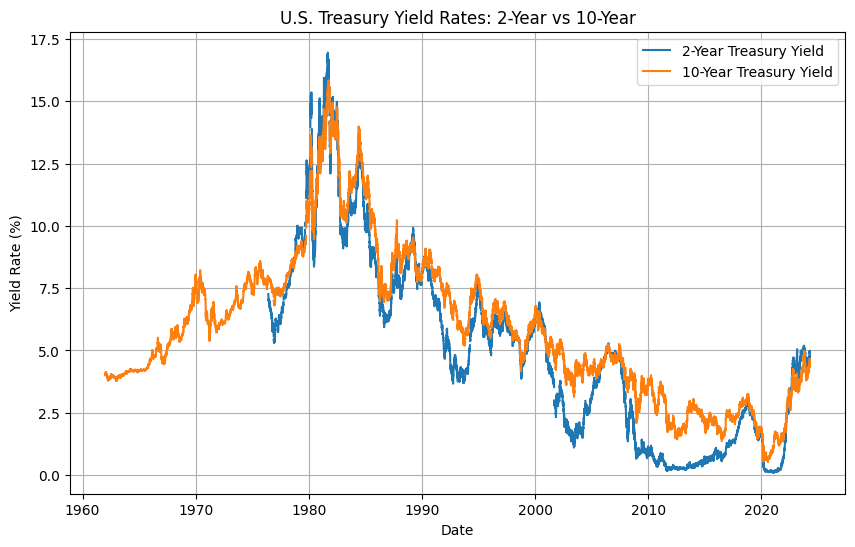

In [11]:
import matplotlib.pyplot as plt

# Plot the yield rates on the same graph
plt.figure(figsize=(10, 6))
plt.plot(dgs2.index, dgs2['DGS2'], label='2-Year Treasury Yield')
plt.plot(dgs10.index, dgs10['DGS10'], label='10-Year Treasury Yield')
plt.title('U.S. Treasury Yield Rates: 2-Year vs 10-Year')
plt.xlabel('Date')
plt.ylabel('Yield Rate (%)')
plt.legend()
plt.grid(True)
plt.show()

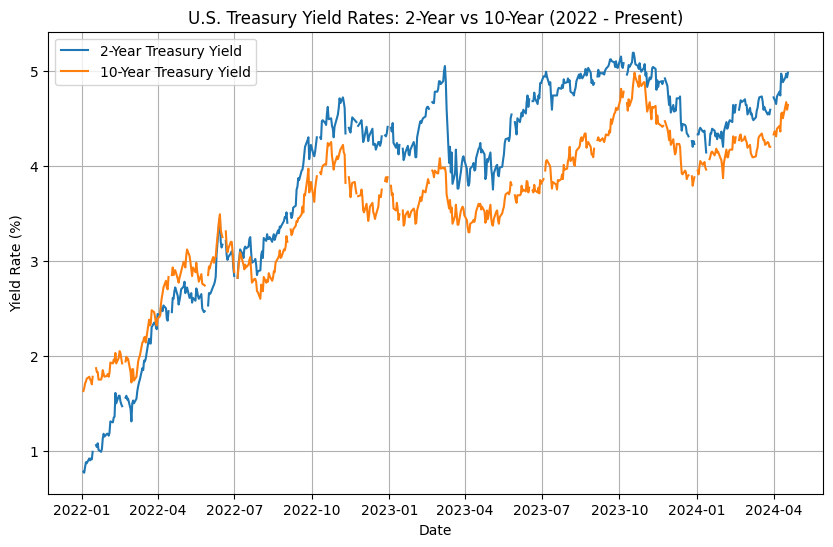

In [12]:
# Get data for 2-year Treasury yield (DGS2) and 10-year Treasury yield (DGS10) from FRED
start = '2022-01-01'  # Start date set to January 1st, 2022
end = pd.Timestamp.today()  # End date set to today's date
dgs2_20 = pdr.DataReader("DGS2", "fred", start=start, end=end)
dgs10_20 = pdr.DataReader("DGS10", "fred", start=start, end=end)

# Plot the yield rates on the same graph
plt.figure(figsize=(10, 6))
plt.plot(dgs2_20.index, dgs2_20['DGS2'], label='2-Year Treasury Yield')
plt.plot(dgs10_20.index, dgs10_20['DGS10'], label='10-Year Treasury Yield')
plt.title('U.S. Treasury Yield Rates: 2-Year vs 10-Year (2022 - Present)')
plt.xlabel('Date')
plt.ylabel('Yield Rate (%)')
plt.legend()
plt.grid(True)
plt.show()

### Think about what does the "inverted yield curve" mean for the market and investors?

 The inverted yield curve occurs when short-term interest rates are higher than long-term rates. In financial markets, this is often seen as a signal of an impending economic downturn. It suggests that investors are expecting lower interest rates in the future, possibly due to a weakening economy.

### Do you see the same thing in your country/market of interest?

It seems that in Spain, in the latest bond auctions, the yield on 3-year bonds is slightly higher than that of 5-year bonds. The Spanish domestic market also has an inverted yield curve.

### Do you think it can be a good predictive feature for the models?

As a predictive model, the inversion of yield curves can be valuable when combined with other economic indicators and analysis techniques. However, it's essential to consider its limitations and potential false signals. Sometimes, an inverted yield curve may precede a recession, but it's not a foolproof predictor.

## Question 3. [Index] Which Index is better recently?
Compare S&P 500 and IPC Mexico indexes by the 5 year growth and write down the largest value as an answer (%)

Download on Yahoo Finance two daily index prices for S&P 500 (^GSPC, https://finance.yahoo.com/quote/%5EGSPC/) and IPC Mexico (^MXX, https://finance.yahoo.com/quote/%5EMXX/). Compare 5Y growth for both (between 2019-04-09 and 2024-04-09). Select the higher growing index and write down the growth in % (closest integer %). E.g. if ratio end/start was 2.0925 (or growth of 109.25%), you need to write down 109 as your answer.

(Additional: think of other indexes and try to download stats and compare the growth? Do create 10Y and 20Y growth stats. What is an average yearly growth rate (CAGR) for each of the indexes you select?)

In [28]:
# Download daily index prices for S&P 500 (^GSPC) and IPC Mexico (^MXX)
sp500 = yf.download("^GSPC", start="2019-04-09", end="2024-04-09")
ipc_mexico = yf.download("^MXX", start="2019-04-09", end="2024-04-09")

# Calculate 5-year growth rates
sp500_growth = (sp500['Adj Close'].iloc[-1] / sp500['Adj Close'].iloc[0] - 1) * 100
ipc_mexico_growth = (ipc_mexico['Adj Close'].iloc[-1] / ipc_mexico['Adj Close'].iloc[0] - 1) * 100

# Select the index with the higher growth rate
better_index = "S&P 500" if sp500_growth > ipc_mexico_growth else "IPC Mexico"
better_growth = round(sp500_growth) if sp500_growth > ipc_mexico_growth else round(ipc_mexico_growth)

print("\n\nBetter index recently:", better_index)
print("5-year growth rate:", better_growth, "%")


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed



Better index recently: S&P 500
5-year growth rate: 81 %


In [14]:
# Download daily index prices for IBEX (^IBEX) and DAX (^GDAXI)
ibex = yf.download("^IBEX", start="2019-04-09", end="2024-04-09")
dax = yf.download("^GDAXI", start="2019-04-09", end="2024-04-09")

# Calculate 5-year growth rates
ibex_growth = (ibex['Adj Close'].iloc[-1] / ibex['Adj Close'].iloc[0] - 1) * 100
dax_growth = (dax['Adj Close'].iloc[-1] / dax['Adj Close'].iloc[0] - 1) * 100

# Select the index with the higher growth rate
better_index = "IBEX" if ibex_growth > dax_growth else "DAX"
better_growth = round(ibex_growth) if ibex_growth > dax_growth else round(dax_growth)

print("\n\nBetter index recently:", better_index)
print("5-year growth rate:", better_growth, "%")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed



Better index recently: DAX
5-year growth rate: 55 %


In [15]:
# Define end date
end_date = date(year=2023, month=12, day=31)

# Define start date for the last 10 years (2013-2023)
start_10y = date(year=2013, month=1, day=1)

# Define start date for the last 20 years (2003-2023)
start_20y = date(year=2003, month=1, day=1)

# Download daily index prices for S&P 500 (^GSPC), IPC Mexico (^MXX), IBEX (^IBEX), and DAX (^GDAXI)
sp500_20y = yf.download("^GSPC", start=start_20y, end=end_date)
ipc_mexico_20y = yf.download("^MXX", start=start_20y, end=end_date)
ibex_20y = yf.download("^IBEX", start=start_20y, end=end_date)
dax_20y = yf.download("^GDAXI", start=start_20y, end=end_date)

sp500_10y = yf.download("^GSPC", start=start_10y, end=end_date)
ipc_mexico_10y = yf.download("^MXX", start=start_10y, end=end_date)
ibex_10y = yf.download("^IBEX", start=start_10y, end=end_date)
dax_10y = yf.download("^GDAXI", start=start_10y, end=end_date)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [16]:
# Function to calculate compound annual growth rate (CAGR)
def calculate_cagr(start_value, end_value, num_years):
    cagr = (end_value / start_value) ** (1 / num_years) - 1
    return cagr * 100

# Calculate 10-year growth rates
sp500_10y_growth = ((sp500_10y['Adj Close'].iloc[-1] / sp500_10y['Adj Close'].iloc[0]) - 1) * 100
ipc_mexico_10y_growth = ((ipc_mexico_10y['Adj Close'].iloc[-1] / ipc_mexico_10y['Adj Close'].iloc[0]) - 1) * 100
ibex_10y_growth = ((ibex_10y['Adj Close'].iloc[-1] / ibex_10y['Adj Close'].iloc[0]) - 1) * 100
dax_10y_growth = ((dax_10y['Adj Close'].iloc[-1] / dax_10y['Adj Close'].iloc[0]) - 1) * 100

# Calculate 20-year growth rates
sp500_20y_growth = ((sp500_20y['Adj Close'].iloc[-1] / sp500_20y['Adj Close'].iloc[0]) - 1) * 100
ipc_mexico_20y_growth = ((ipc_mexico_20y['Adj Close'].iloc[-1] / ipc_mexico_20y['Adj Close'].iloc[0]) - 1) * 100
ibex_20y_growth = ((ibex_20y['Adj Close'].iloc[-1] / ibex_20y['Adj Close'].iloc[0]) - 1) * 100
dax_20y_growth = ((dax_20y['Adj Close'].iloc[-1] / dax_20y['Adj Close'].iloc[0]) - 1) * 100

# Calculate average yearly growth rates (CAGR)
num_years_10y = 10
sp500_cagr_10y = calculate_cagr(sp500_10y['Adj Close'].iloc[0], sp500_10y['Adj Close'].iloc[-1], num_years_10y)
ipc_mexico_cagr_10y = calculate_cagr(ipc_mexico_10y['Adj Close'].iloc[0], ipc_mexico_10y['Adj Close'].iloc[-1], num_years_10y)
ibex_cagr_10y = calculate_cagr(ibex_10y['Adj Close'].iloc[0], ibex_10y['Adj Close'].iloc[-1], num_years_10y)
dax_cagr_10y = calculate_cagr(dax_10y['Adj Close'].iloc[0], dax_10y['Adj Close'].iloc[-1], num_years_10y)

num_years_20y = 20
sp500_cagr_20y = calculate_cagr(sp500_20y['Adj Close'].iloc[0], sp500_20y['Adj Close'].iloc[-1], num_years_20y)
ipc_mexico_cagr_20y = calculate_cagr(ipc_mexico_20y['Adj Close'].iloc[0], ipc_mexico_20y['Adj Close'].iloc[-1], num_years_20y)
ibex_cagr_20y = calculate_cagr(ibex_20y['Adj Close'].iloc[0], ibex_20y['Adj Close'].iloc[-1], num_years_20y)
dax_cagr_20y = calculate_cagr(dax_20y['Adj Close'].iloc[0], dax_20y['Adj Close'].iloc[-1], num_years_20y)

# Print the results
print("10-year growth rates:")
print("S&P 500:", round(sp500_10y_growth, 2), "%")
print("IPC Mexico:", round(ipc_mexico_10y_growth, 2), "%")
print("IBEX:", round(ibex_10y_growth, 2), "%")
print("DAX:", round(dax_10y_growth, 2), "%")
print()
print("20-year growth rates:")
print("S&P 500:", round(sp500_20y_growth, 2), "%")
print("IPC Mexico:", round(ipc_mexico_20y_growth, 2), "%")
print("IBEX:", round(ibex_20y_growth, 2), "%")
print("DAX:", round(dax_20y_growth, 2), "%")
print()
print("Average yearly growth rates (CAGR) for 10 years:")
print("S&P 500:", round(sp500_cagr_10y, 2), "%")
print("IPC Mexico:", round(ipc_mexico_cagr_10y, 2), "%")
print("IBEX:", round(ibex_cagr_10y, 2), "%")
print("DAX:", round(dax_cagr_10y, 2), "%")
print()
print("Average yearly growth rates (CAGR) for 20 years:")
print("S&P 500:", round(sp500_cagr_20y, 2), "%")
print("IPC Mexico:", round(ipc_mexico_cagr_20y, 2), "%")
print("IBEX:", round(ibex_cagr_20y, 2), "%")
print("DAX:", round(dax_cagr_20y, 2), "%")


10-year growth rates:
S&P 500: 226.16 %
IPC Mexico: 29.53 %
IBEX: 19.59 %
DAX: 115.35 %

20-year growth rates:
S&P 500: 424.72 %
IPC Mexico: 821.81 %
IBEX: 60.76 %
DAX: 439.5 %

Average yearly growth rates (CAGR) for 10 years:
S&P 500: 12.55 %
IPC Mexico: 2.62 %
IBEX: 1.8 %
DAX: 7.97 %

Average yearly growth rates (CAGR) for 20 years:
S&P 500: 8.64 %
IPC Mexico: 11.75 %
IBEX: 2.4 %
DAX: 8.79 %


## Question 4. [Stocks OHLCV] 52-weeks range ratio (2023) for the selected stocks
Find the largest range ratio [=(max-min)/max] of Adj.Close prices in 2023

Download the 2023 daily OHLCV data on Yahoo Finance for top5 stocks on earnings (https://companiesmarketcap.com/most-profitable-companies/): 2222.SR,BRK-B, AAPL, MSFT, GOOG, JPM.

Here is the example data you should see in Pandas for "2222.SR": https://finance.yahoo.com/quote/2222.SR/history

Calculate maximum-minimim "Adj.Close" price for each stock and divide it by the maximum "Adj.Close" value. Round the result to two decimal places (e.g. 0.1575 will be 0.16)

(Additional: why this may be important for your research?)

In [17]:
import requests
from bs4 import BeautifulSoup

# URL of the web page
url = 'https://companiesmarketcap.com/most-profitable-companies/'

# Make a GET request to fetch the page content
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the HTML content using BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find all rows in the table containing company data
    rows_rank = soup.find('table').find_all('td', class_='rank-td td-right')
    rows_company = soup.find('table').find_all('td', class_='name-td')

# Initialize a dictionary to store company data
companies_data = {}

# Iterate over the two lists simultaneously using zip
for rank, company in zip(rows_rank, rows_company):
    # Extract the company's rank
    rank_value = rank.text.strip()
    # Extract the company's name
    company_name = company.find('div', class_='company-name').text.strip()
    # Extract the company's code
    company_code = company.find('div', class_='company-code').text.strip().split()[-1]

    # Add the company data to the dictionary with the rank as the key
    companies_data[rank_value] = {'Name': company_name, 'Ticker': company_code}

# Print the dictionary with data for all companies
print(companies_data)


{'1': {'Name': 'Saudi Aramco', 'Ticker': '2222.SR'}, '2': {'Name': 'Berkshire Hathaway', 'Ticker': 'BRK-B'}, '3': {'Name': 'Apple', 'Ticker': 'AAPL'}, '4': {'Name': 'Microsoft', 'Ticker': 'MSFT'}, '5': {'Name': 'Alphabet (Google)', 'Ticker': 'GOOG'}, '6': {'Name': 'JPMorgan Chase', 'Ticker': 'JPM'}, '7': {'Name': 'ICBC', 'Ticker': '1398.HK'}, '8': {'Name': 'China Construction Bank', 'Ticker': '601939.SS'}, '9': {'Name': 'Exxon Mobil', 'Ticker': 'XOM'}, '10': {'Name': 'Meta Platforms (Facebook)', 'Ticker': 'META'}, '11': {'Name': 'China Pacific Insurance', 'Ticker': '601601.SS'}, '12': {'Name': 'Agricultural Bank of China', 'Ticker': '601288.SS'}, '13': {'Name': 'Toyota', 'Ticker': 'TM'}, '14': {'Name': 'Petrobras', 'Ticker': 'PBR'}, '15': {'Name': 'Bank of China', 'Ticker': '601988.SS'}, '16': {'Name': 'Amazon', 'Ticker': 'AMZN'}, '17': {'Name': 'Equinor', 'Ticker': 'EQNR'}, '18': {'Name': 'TSMC', 'Ticker': 'TSM'}, '19': {'Name': 'TotalEnergies', 'Ticker': 'TTE'}, '20': {'Name': 'Petro

In [18]:
# Initialize a list to store the company codes
all_tickers = []

# Iterate over the companies_data dictionary and extract the company codes
for company_data in companies_data.values():
    ticker = company_data['Ticker']
    all_tickers.append(ticker)

# Select the first 6 tickers
tickers = all_tickers[:6]

print(tickers)


['2222.SR', 'BRK-B', 'AAPL', 'MSFT', 'GOOG', 'JPM']


In [19]:
# List of stock tickers
tickers = ['2222.SR', 'BRK-B', 'AAPL', 'MSFT', 'GOOG', 'JPM']

# Dictionary to store the range ratios for each stock
range_ratios = {}

# Download data and calculate range ratios
for ticker in tickers:
    # Download data for 2023
    data = yf.download(ticker, start='2023-01-01', end='2023-12-31')

    # Calculate maximum and minimum Adj. Close prices
    max_price = data['Adj Close'].max()
    min_price = data['Adj Close'].min()

    # Calculate range ratio
    range_ratio = (max_price - min_price) / max_price

    # Store the range ratio in the dictionary
    range_ratios[ticker] = round(range_ratio, 2)

# Find the stock with the largest range ratio
largest_range_stock = max(range_ratios, key=range_ratios.get)
largest_range_ratio = range_ratios[largest_range_stock]

# Print the results
print("\n\n")
print("52-weeks range ratio (2023) for the selected stocks:")
for ticker, ratio in range_ratios.items():
    print(f"{ticker}: {ratio}")

print("\nLargest range ratio:")
print(f"Stock: {largest_range_stock}, Range Ratio: {largest_range_ratio}")


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed




52-weeks range ratio (2023) for the selected stocks:
2222.SR: 0.21
BRK-B: 0.21
AAPL: 0.37
MSFT: 0.42
GOOG: 0.39
JPM: 0.28

Largest range ratio:
Stock: MSFT, Range Ratio: 0.42


### Why this may be important for your research?


The 52-weeks range ratio for selected stocks provides valuable information about the volatility and trading range of a stock's price over the past year. Here's why this data may be important for research:

* Risk Assessment: Investors and researchers use the 52-weeks range ratio to assess the risk associated with a particular stock. A higher range ratio indicates greater price volatility, which may be perceived as riskier for some investors.

* Investment Strategy: Understanding the range ratio helps investors tailor their investment strategies. For example, investors seeking high-growth opportunities may prefer stocks with higher range ratios, while conservative investors may prefer stocks with lower volatility.

* Technical Analysis: Traders use the 52-weeks range ratio as part of technical analysis to identify potential buying or selling opportunities. Breakouts from the stock's trading range may signal a change in trend and provide trading signals.

* Comparison with Peers: Comparing the range ratios of different stocks within the same industry or sector can help investors identify outliers and potential investment opportunities. It also provides insights into how individual stocks perform relative to their peers.

* Long-term Performance: Monitoring changes in the range ratio over time can provide insights into the long-term performance and stability of a stock. Stocks with consistently low or high range ratios may exhibit different characteristics over time.

* Portfolio Diversification: Incorporating stocks with a range of range ratios into a portfolio can help diversify risk. Combining stocks with different volatility levels can mitigate overall portfolio risk while potentially enhancing returns.

## Question 5. [Stocks] Dividend Yield
Find the largest dividend yield for the same set of stocks

Use the same list of companies (2222.SR,BRK-B, AAPL, MSFT, GOOG, JPM) and download all dividends paid in 2023. You can use get_actions() method or .dividends field in yfinance library (https://github.com/ranaroussi/yfinance?tab=readme-ov-file#quick-start)

Sum up all dividends paid in 2023 per company and divide each value by the closing price (Adj.Close) at the last trading day of the year.

Find the maximm value in % and round to 1 digit after the decimal point. (E.g. if you obtained dolar 1.25 dividends paid and the end year stock price is $100, the dividend yield is 1.25% -- and your answer should be equal to 1.3)

In [20]:
# Using .dividends

# List of company ticker symbols
# tickers = ['2222.SR', 'BRK-B', 'AAPL', 'MSFT', 'GOOG', 'JPM']

# Dictionary to store dividend yields for each company
dividend_yields = {}

# Iterate over each company
for ticker in tickers:
    # Download the ticker data
    stock = yf.Ticker(ticker)

    # Get historical data for 2023
    hist = stock.history(start="2023-01-01", end="2023-12-31")

    # Get dividends for 2023
    dividends = stock.dividends.loc['2023']

    # Sum up all dividends paid in 2023
    total_dividends = dividends.sum()

    # Download stock data for the last trading day of 2023
    closing_price = hist['Close'][-1]  # Get the closing price

    # Calculate dividend yield and store in the dictionary
    dividend_yield = (total_dividends / closing_price) * 100
    dividend_yields[ticker] = dividend_yield

# Find the maximum dividend yield
max_dividend_yield = max(dividend_yields.values())

# Print the results
print("Dividend Yields for the selected stocks in 2023:")
for ticker, yield_value in dividend_yields.items():
    print(f"{ticker}: {yield_value:.1f}%")

print("\nLargest Dividend Yield:")
print(f"{max_dividend_yield:.1f}%")


Dividend Yields for the selected stocks in 2023:
2222.SR: 2.8%
BRK-B: 0.0%
AAPL: 0.5%
MSFT: 0.7%
GOOG: 0.0%
JPM: 2.4%

Largest Dividend Yield:
2.8%


In [21]:
# Using getactions()

# List of company ticker symbols
#tickers = ['2222.SR', 'BRK-B', 'AAPL', 'MSFT', 'GOOG', 'JPM']

# Dictionary to store dividend yields for each company
dividend_yields = {}

# Iterate over each company
for ticker in tickers:
    # Download the ticker data
    stock = yf.Ticker(ticker)

    # Get corporate actions for 2023
    actions = stock.get_actions()

    # Filter dividend actions for 2023
    dividends = actions[(actions['Dividends'] != 0) & (actions.index.year == 2023)]

    # Sum up all dividends paid in 2023
    total_dividends = dividends['Dividends'].sum()

    # Download stock data for the last trading day of 2023
    hist = stock.history(start="2023-01-01", end="2023-12-31")
    closing_price = hist['Close'][-1]  # Get the closing price

    # Calculate dividend yield and store in the dictionary
    dividend_yield = (total_dividends / closing_price) * 100
    dividend_yields[ticker] = dividend_yield

# Find the maximum dividend yield
max_dividend_yield = max(dividend_yields.values())

# Print the results
print("Dividend Yields for the selected stocks in 2023:")
for ticker, yield_value in dividend_yields.items():
    print(f"{ticker}: {yield_value:.1f}%")

print("\nLargest Dividend Yield:")
print(f"{max_dividend_yield:.1f}%")



Dividend Yields for the selected stocks in 2023:
2222.SR: 2.8%
BRK-B: 0.0%
AAPL: 0.5%
MSFT: 0.7%
GOOG: 0.0%
JPM: 2.4%

Largest Dividend Yield:
2.8%


## Question 6. [Exploratory] Investigate new metrics
Free text answer

Download and explore a few additional metrics or time series that might be valuable for your project and write down why (briefly).

## Quantitative Analysis

We want to understand the functioning of financial markets from a statistical perspective.

Concepts such as trend and returns.

<Axes: xlabel='Date'>

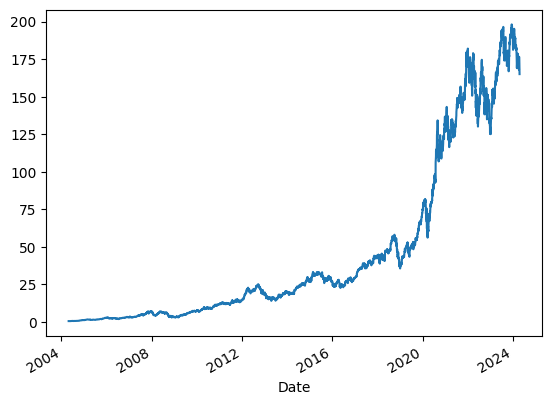

In [22]:
#@title Historical Data
Asset = "aapl" #@param {type:"string"}
# Historical data management - data preparation
df = yf.download(Asset,
                      start= date.today() - timedelta(days=365*20),
                      end=date.today(),
                      progress=False,
)
df['Close'].plot()


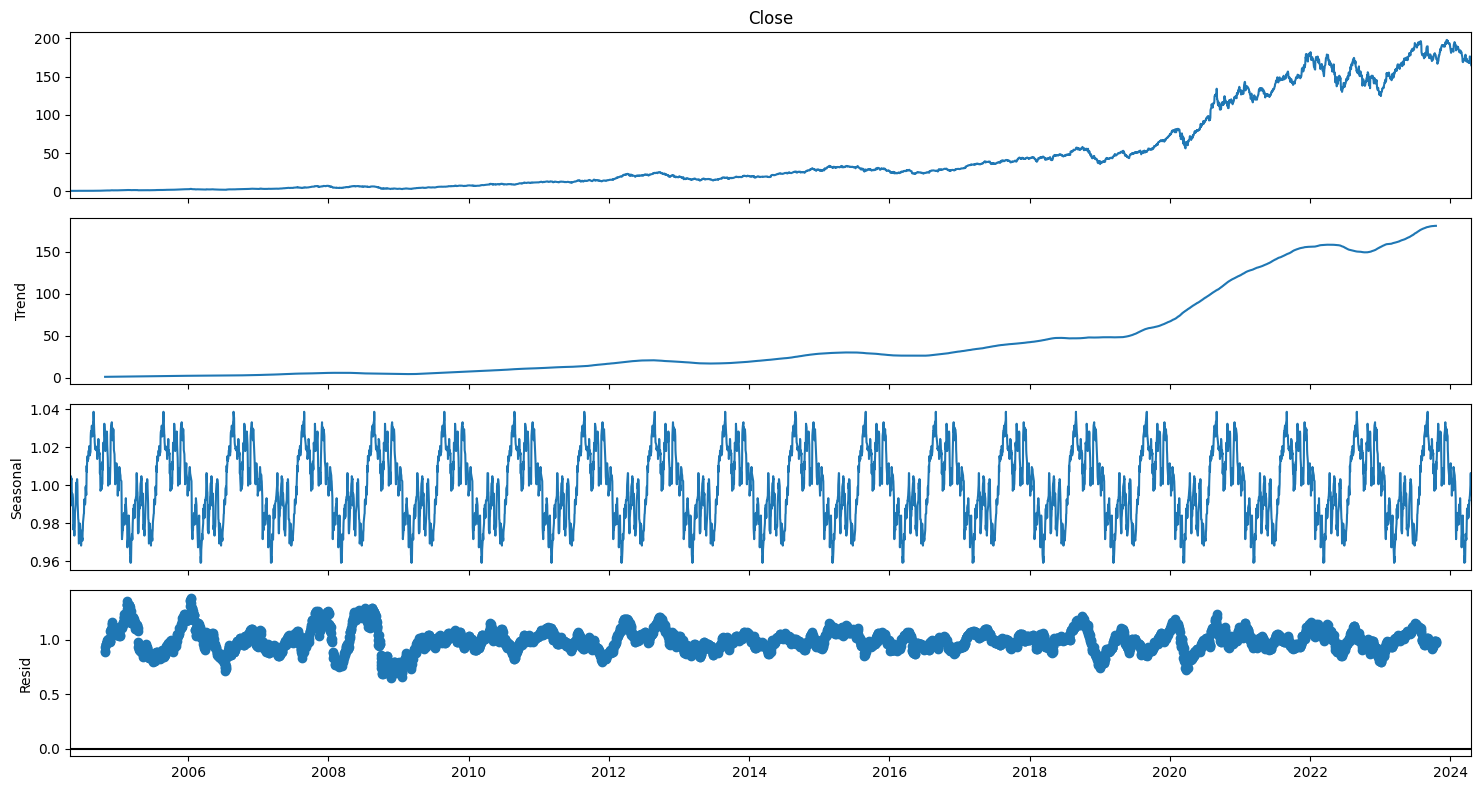

In [23]:
#@title Time Series
from statsmodels.tsa.seasonal import seasonal_decompose
df = df.dropna()
result = seasonal_decompose(x=df['Close'], model='multiplicative', period=252)
plt.rc("figure", figsize=(15,8))
result.plot()
plt.show()


Mean Return:  0.032945826383044656
Mean Return + 2Std.Dev:  2.64621889406922
Mean Return + 1Std.Dev:  1.3395823602261325
Mean Return - 1Std.Dev:  -1.2736907074600432
Mean Return - 2Std.Dev:  -2.5803272413031313


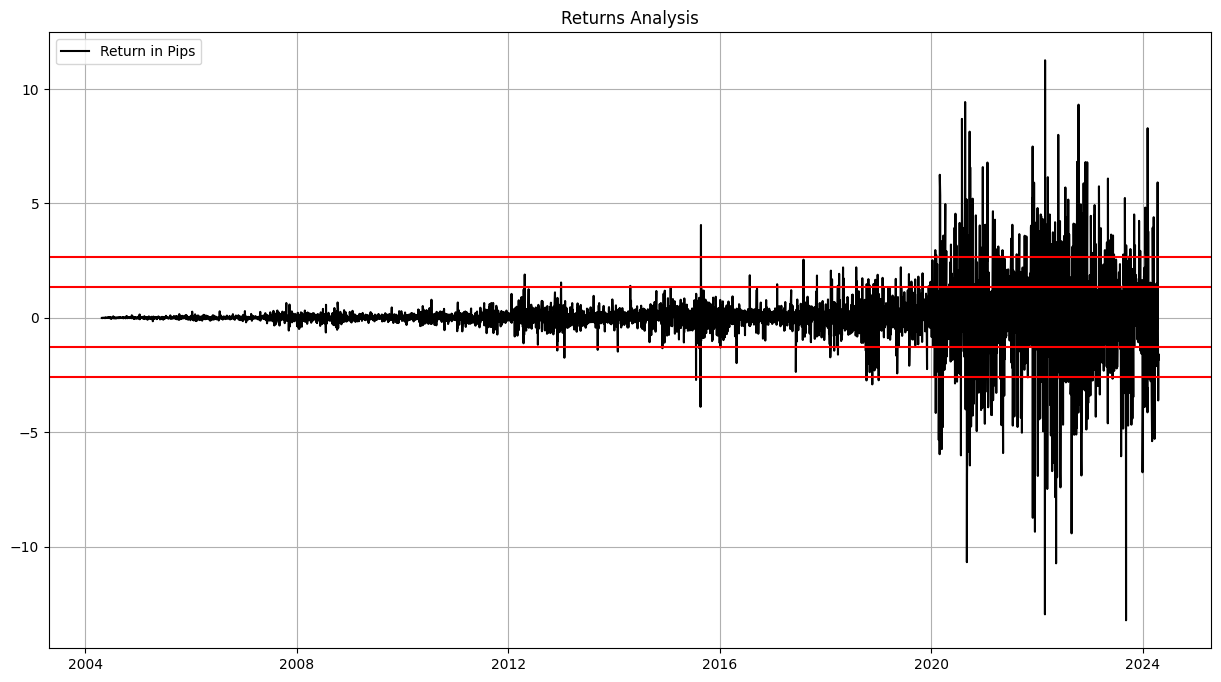

In [24]:
#@title Returns Analysis
#Returns analysis indicates what scenarios we can expect in different market situations.
#Significant impacts of these scenarios are observed based on standard deviation.
df['Returns'] = df['Open'].shift(-1) - df['Open']

#Mean and Std.Dev of Returns
mean_returns = df['Returns'].mean()

print('Mean Return: ', mean_returns)

std_dev = df['Returns'].std()

print('Mean Return + 2Std.Dev: ', mean_returns+(std_dev*2))
print('Mean Return + 1Std.Dev: ', mean_returns+std_dev)
print('Mean Return - 1Std.Dev: ', mean_returns-std_dev)
print('Mean Return - 2Std.Dev: ', mean_returns-(std_dev*2))
#Advanced Plot
plt.figure(figsize=(15,8))
plt.title('Returns Analysis')
plt.plot(df['Returns'],color='black',label='Return in Pips')
plt.axhline(y=mean_returns+(std_dev*2),color='red', linestyle='-')
plt.axhline(y=mean_returns+(std_dev*1),color='red', linestyle='-')
plt.axhline(y=mean_returns-(std_dev*1),color='red', linestyle='-')
plt.axhline(y=mean_returns-(std_dev*2),color='red', linestyle='-')
plt.legend(loc='upper left')
plt.grid()
plt.show()


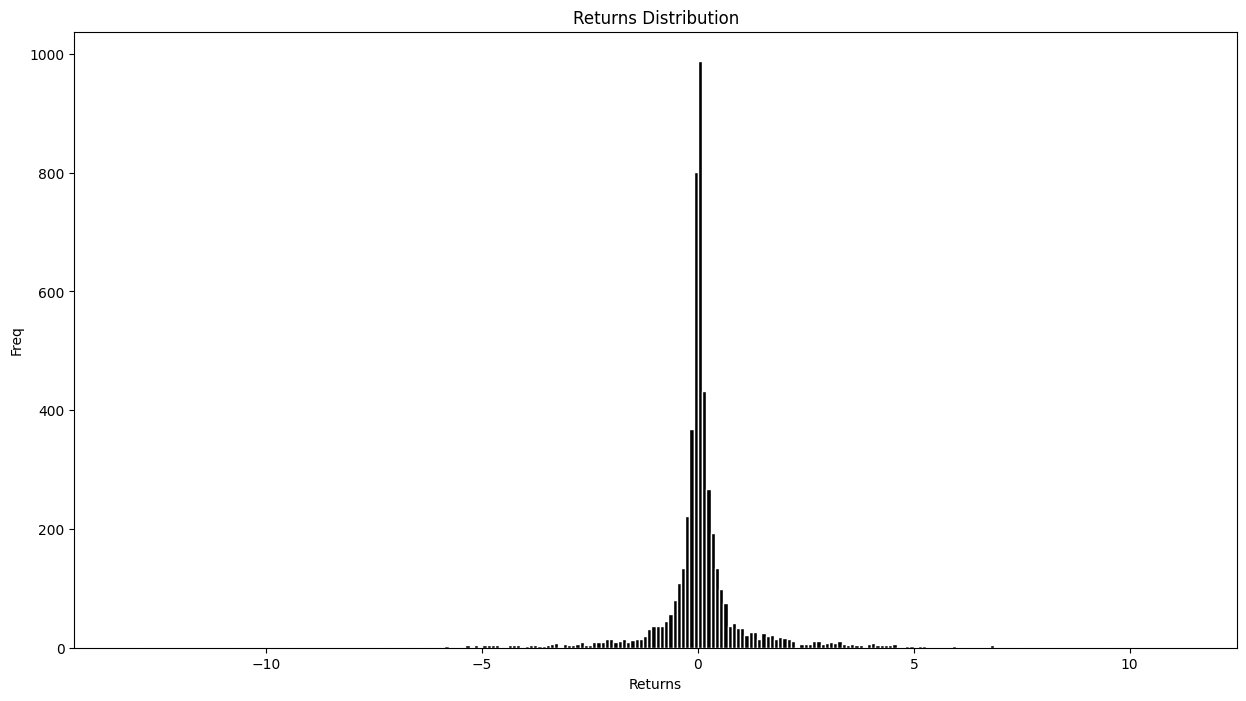

In [25]:
#@title Returns Distribution
plt.figure(figsize=(15,8))
plt.hist(df['Returns'], color='Black', edgecolor='White', linewidth=1, bins=250)
plt.title('Returns Distribution')
plt.xlabel('Returns', fontsize=10)
plt.ylabel('Freq', fontsize=10)
plt.show()


#### Importance of distribution and returns analysis for investment

Distribution and returns analysis are critical components of investment management that help investors make informed decisions and optimize their investment portfolios. Here's why they're important:

* **Risk Management:** Distribution analysis helps investors understand the probability distribution of potential returns or losses associated with an investment. By analyzing the frequency and magnitude of potential outcomes, investors can assess the risk of different investments and make informed decisions about portfolio allocation. Return analysis complements this by providing insights into historical performance, allowing investors to gauge how an investment has performed in various market conditions.
* **Portfolio Diversification:** Distribution analysis enables investors to assess the correlation between different assets or investments within a portfolio. Diversification is a key strategy for reducing portfolio risk, and distribution analysis helps investors identify assets with low or negative correlations, which can help balance risk and return across the portfolio. Return analysis helps investors evaluate the historical performance of individual assets and how they contribute to overall portfolio returns.
* **Asset Allocation:** Distribution and return analysis inform asset allocation decisions by helping investors identify investments that offer the optimal balance between risk and return. By considering the distribution of potential outcomes and historical performance, investors can allocate their capital more effectively across different asset classes, such as stocks, bonds, real estate, and alternative investments, to achieve their investment objectives while managing risk.
* **Performance Evaluation:** Return analysis is essential for evaluating the performance of investment portfolios and individual assets over time. By comparing actual returns to expected returns based on distribution analysis, investors can assess the effectiveness of their investment strategies and make adjustments as needed to improve performance. Return analysis also helps investors identify areas of strength and weakness within their portfolios and make informed decisions about rebalancing or reallocation.
* **Decision Making:** Ultimately, distribution and return analysis provide investors with valuable insights and information that they can use to make better investment decisions. Whether it's selecting the right mix of assets for a portfolio, evaluating the risk-return tradeoff of different investment opportunities, or assessing the performance of existing investments, distribution and return analysis serve as essential tools for informed decision-making in the complex world of investing.

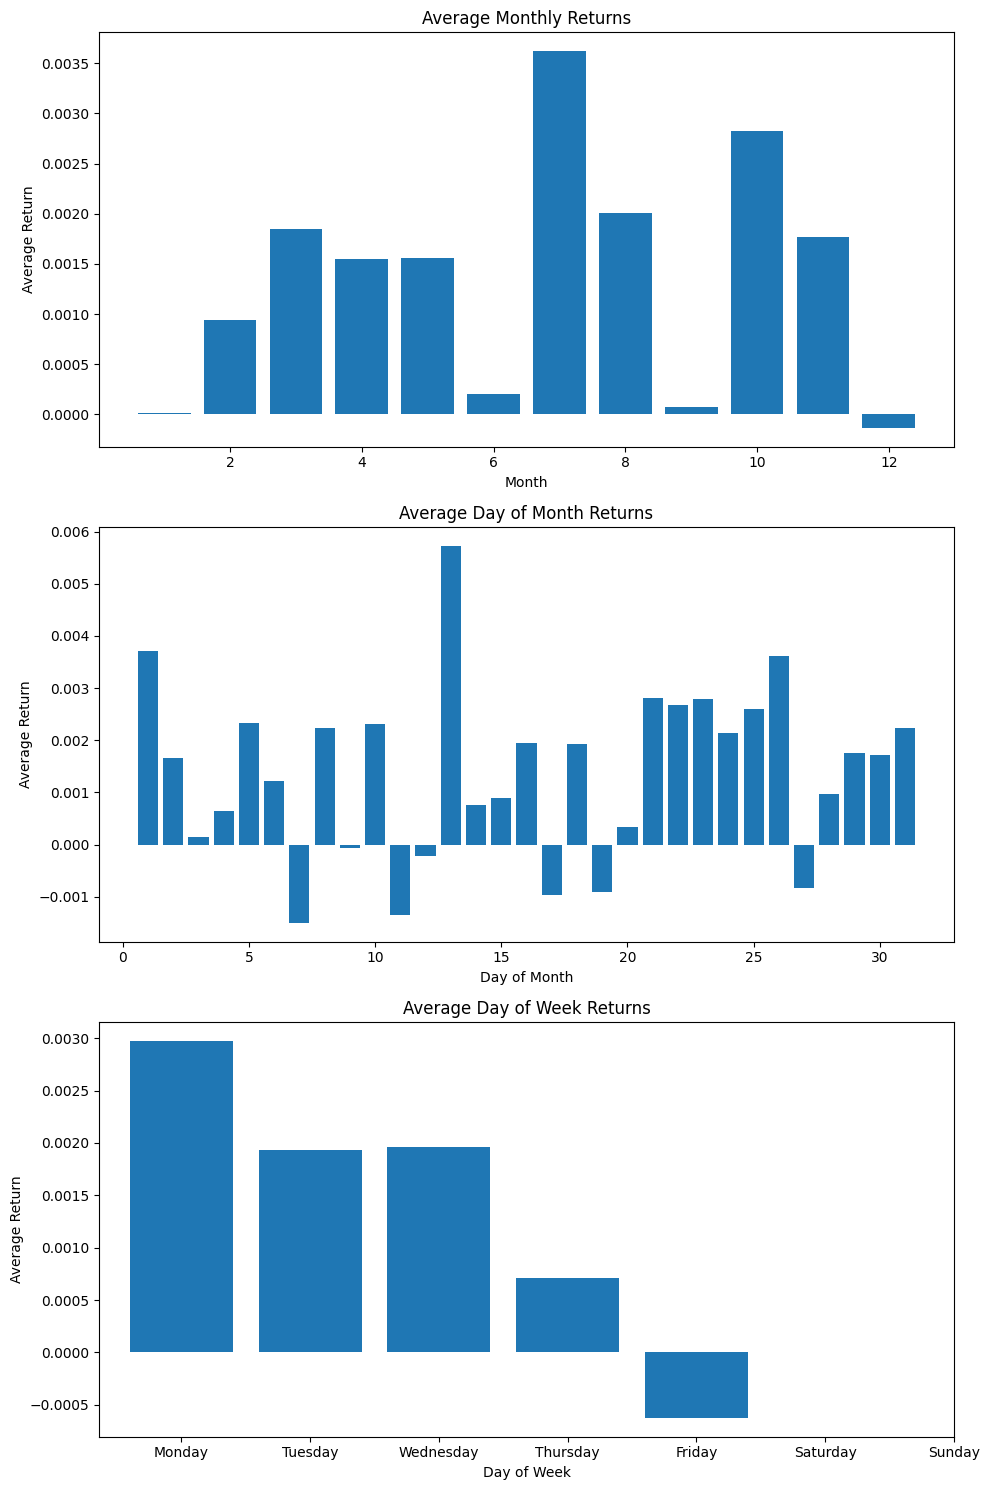

In [26]:
#@title Seasonality Analysis
# Calculate daily returns
df['Daily Returns'] = df['Close'].pct_change()

# Extract year, month, day of month, and day of week from the index (Date)
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Day of Month'] = df.index.day
df['Day of Week'] = df.index.dayofweek  # Monday=0, Sunday=6

# Group by month to calculate average monthly returns
monthly_returns = df.groupby('Month')['Daily Returns'].mean()

# Group by day of the month to calculate average daily returns
dom_returns = df.groupby('Day of Month')['Daily Returns'].mean()

# Group by day of the week to calculate average returns for each day of the week
dow_returns = df.groupby('Day of Week')['Daily Returns'].mean()

# Plotting
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Average Monthly Returns
axs[0].bar(monthly_returns.index, monthly_returns.values)
axs[0].set_title('Average Monthly Returns')
axs[0].set_xlabel('Month')
axs[0].set_ylabel('Average Return')

# Average Day of Month Returns
axs[1].bar(dom_returns.index, dom_returns.values)
axs[1].set_title('Average Day of Month Returns')
axs[1].set_xlabel('Day of Month')
axs[1].set_ylabel('Average Return')

# Average Day of Week Returns
axs[2].bar(dow_returns.index, dow_returns.values)
axs[2].set_title('Average Day of Week Returns')
axs[2].set_xlabel('Day of Week')
axs[2].set_ylabel('Average Return')
axs[2].set_xticks(range(0, 7))
axs[2].set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.tight_layout()
plt.show()


#### Importance of Seasonality Analysis for investment:

* **Identifying Patterns:** Seasonality analysis involves examining historical data to identify recurring patterns or trends that occur at certain times of the year. For example, certain industries or sectors may experience increased demand during specific seasons due to weather patterns, holidays, or other factors. By understanding these patterns, investors can anticipate when certain investments are likely to perform well or poorly and adjust their strategies accordingly.
* **Timing Investments:** Seasonality analysis helps investors time their investments more effectively. By identifying seasonal trends, investors can strategically enter or exit positions to capitalize on expected price movements. For example, they may choose to invest in agricultural commodities ahead of the planting season when demand typically increases, or they may sell retail stocks after the holiday shopping season when sales tend to slow down.
* **Managing Risk:** Seasonality analysis can also help investors manage risk by providing insights into potential market fluctuations. By understanding when certain investments are likely to be more volatile or experience lower liquidity, investors can adjust their positions or implement hedging strategies to mitigate risk during these periods.
* **Informing Portfolio Allocation:** Seasonality analysis can inform portfolio allocation decisions by highlighting opportunities in different asset classes or sectors at different times of the year. For example, investors may overweight sectors that historically outperform during certain seasons or rotate into defensive assets during periods of heightened market volatility.
* **Improving Performance:** By incorporating seasonality analysis into their investment process, investors can potentially improve the overall performance of their portfolios. By taking advantage of seasonal trends and avoiding periods of underperformance, investors can enhance returns and reduce losses over time.

## Question 7. [Exploratory] Time-driven strategy description around earnings releases
Free text answer

Explore earning dates for the whole month of April - e.g. using YahooFinance earnings calendar (https://finance.yahoo.com/calendar/earnings?from=2024-04-21&to=2024-04-27&day=2024-04-23). Compare with the previous closed earnings (e.g., recent dates with full data https://finance.yahoo.com/calendar/earnings?from=2024-04-07&to=2024-04-13&day=2024-04-08).

Describe an analytical strategy/idea (you're not required to implement it) to select a subset companies of interest based on the future events data.

My idea would be based on the search for a relatively quick operation. I would research the last 5 years.

* The evolution of earnings.
* The post earnings movement.
* The volatility and the amplitude of the movement.
* General market sentiment.
* The sentiment of the sector to which the company belongs.
* Sentiment of social media and specialized media.

If the sentiment is positive and the earnings performance is positive. I would open long.

If the sentiment are negative or neutral and the evolution of earnings is downward. I would open short.

In any other situation I would not open a trade.